In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [13]:
def delta(z,om,ol):
    f=(om*(1+z)**3)/((om*(1+z)**3)+ol)
    d=6*(np.pi**2) * (1.+0.4093*(((1./f) - 1.)**(0.9052)))-1
    
    d2=((3*(12*np.pi)**(2./3.))/20.)*(1.+0.123*np.log10(f))
    
    return d

In [12]:
path='/mnt/is2/dpaz/ITV/512_mass/'
s=pynbody.load(path+'snapshot_047')

In [14]:
a=s.properties['a']
om=s.properties['omegaM0']
ol=s.properties['omegaL0']

redshift=1./a -1
print(redshift)

0.19691083351258976


In [15]:
gas = s.gas
pos = gas['pos']
u   = gas['u']
ne  = gas['ne']
rho = gas['rho']
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu=(1.0-yHe)/(1+yHe+ne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te=(5./3.-1.)*u*vv*mu*mp/kcgs

In [21]:
gas.loadable_keys()

['smooth',
 'mass',
 'idgn',
 'vel',
 'iord',
 'pos',
 'idch',
 'rho',
 'sfr',
 'abvc',
 'ne',
 'nh',
 'u']

In [16]:
cut=np.arange(0,len(u),100)
len(cut)

1237786

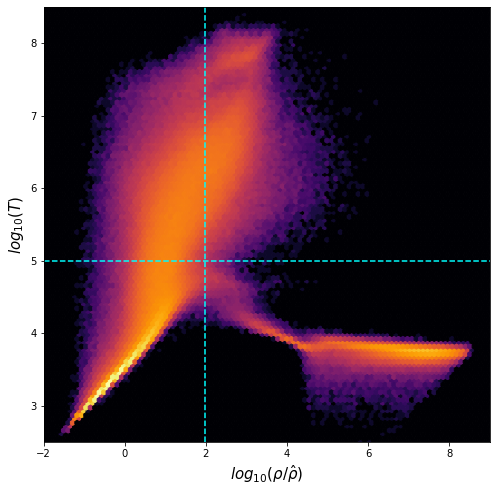

In [17]:
plt.figure(figsize=(8,8))
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)
plt.hexbin(np.log10(rho[cut]/dgs),np.log10(te[cut]),extent=(-2,9,2.5,8.5),bins='log',cmap='inferno')
plt.xlabel('$log_{10}(\\rho / \hat{\\rho})$',size=15)
plt.ylabel('$log_{10}(T)$',size=15)
plt.vlines(x=np.log10(delta(redshift,om,ol)+1),ymin=2.5,ymax=8.5,color='cyan',ls='--')
plt.hlines(y=5,xmin=-2,xmax=9,color='cyan',ls='--')

In [18]:
difu, = np.where((te[cut] < 10**5)  & (rho[cut] < delta(redshift,0.276,0.724)))
whim, = np.where((te[cut] >= 10**5) & (rho[cut] < delta(redshift,0.276,0.724)))
hot,  = np.where((te[cut] >= 10**5) & (rho[cut] >= delta(redshift,0.276,0.724)))
cond, = np.where((te[cut] < 10**5)  & (rho[cut] >= delta(redshift,0.276,0.724)))
tot=len(difu)+len(whim)+len(hot)+len(cond)
print('difuso:',len(difu)/tot)
print('whim:',len(whim)/tot)
print('hot:',len(hot)/tot)
print('condensado:',len(cond)/tot)

difuso: 0.44735762078420666
whim: 0.2478207056793339
hot: 0.16827868468378218
condensado: 0.1365429888526773
